In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Impostazione del percorso dei file
path = r"C:\Users\fabio\OneDrive\Desktop\Nuova cartella"

In [3]:
# Caricamento dei dati
df1 = pd.read_excel(os.path.join(path, "casi_prelievo_diagnosi.xlsx"))
df2 = pd.read_excel(os.path.join(path, "casi_regioni.xlsx"))
df3 = pd.read_excel(os.path.join(path, "casi_provincie.xlsx"))
df4 = pd.read_excel(os.path.join(path, "Ricoveri.xlsx"))
df5 = pd.read_excel(os.path.join(path, "Decessi.xlsx"))
df6 = pd.read_excel(os.path.join(path, "sesso_eta.xlsx"))

In [7]:
# Conversione delle date
date_columns = {
    'df1': ['data_prelievo_diagnosi', 'iss_date'],
    'df2': ['iss_date'],
    'df3': ['iss_date'],
    'df4': ['DATARICOVERO1', 'iss_date'],
    'df5': ['DATA_DECESSI', 'iss_date'],
    'df6': ['iss_date']
}

for df_name, columns in date_columns.items():
    for col in columns:
        if col in locals()[df_name].columns:
            locals()[df_name][col] = pd.to_datetime(locals()[df_name][col])

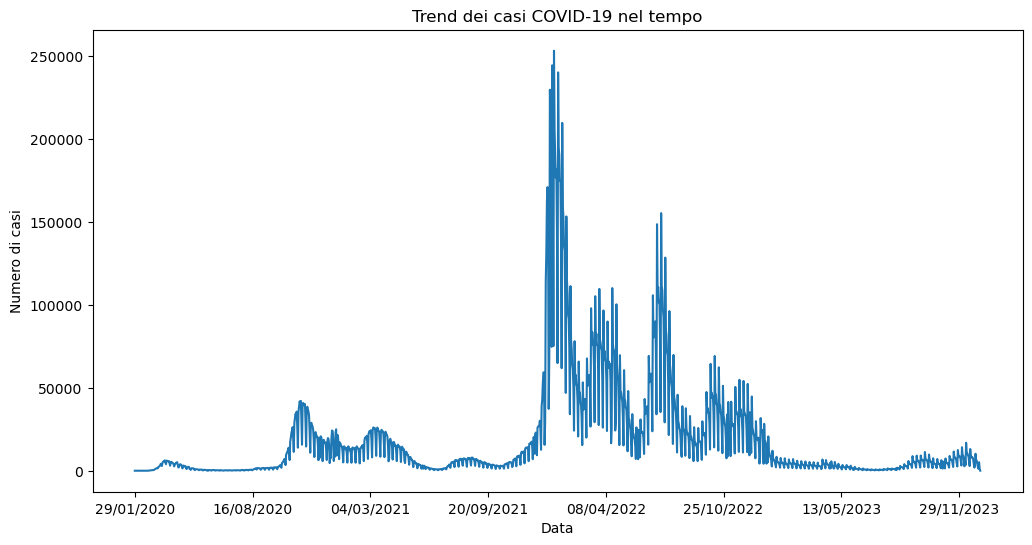

In [10]:
# Analisi del primo file: Trend dei casi nel tempo
plt.figure(figsize=(12, 6))
df1.set_index('DATA_PRELIEVO_DIAGNOSI')['CASI'].plot()
plt.title('Trend dei casi COVID-19 nel tempo')
plt.xlabel('Data')
plt.ylabel('Numero di casi')
plt.show()

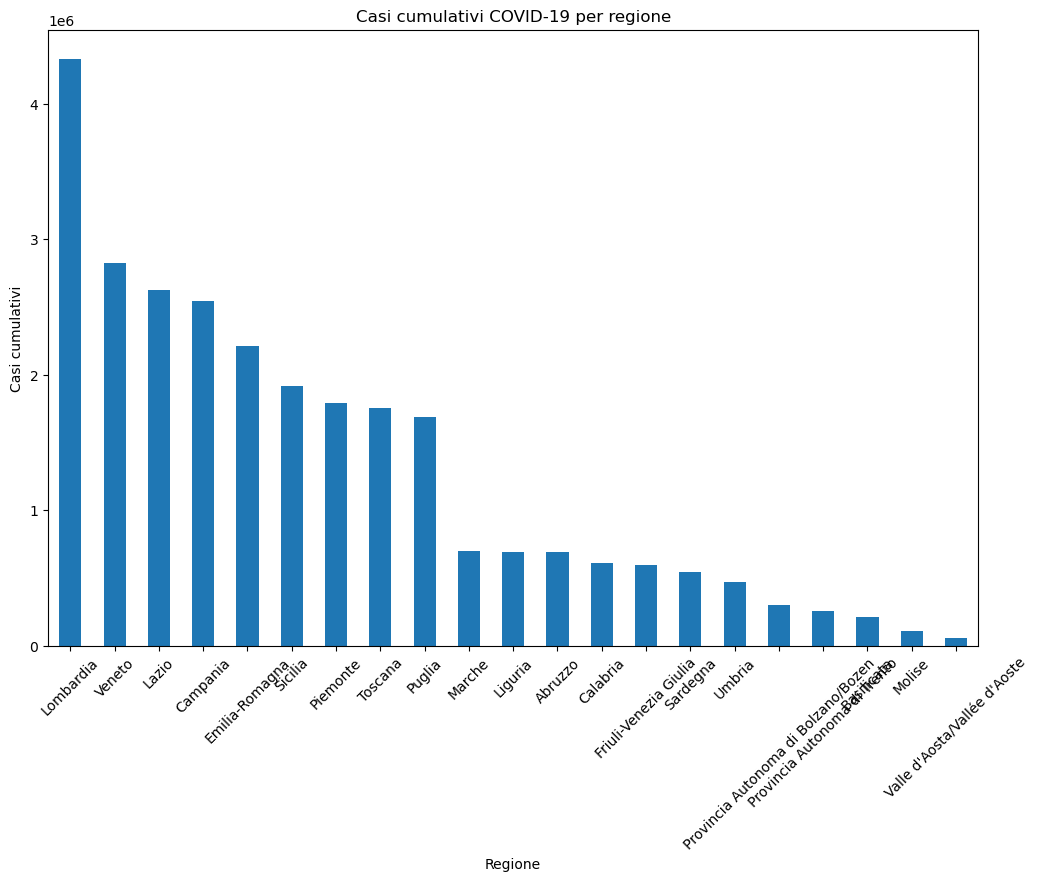

In [11]:
# Analisi del secondo file: Casi cumulativi per regione
casi_per_regione = df2.groupby('NOME_NUTS2')['CASI_CUMULATIVI'].max().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
casi_per_regione.plot(kind='bar')
plt.title('Casi cumulativi COVID-19 per regione')
plt.xlabel('Regione')
plt.ylabel('Casi cumulativi')
plt.xticks(rotation=45)
plt.show()


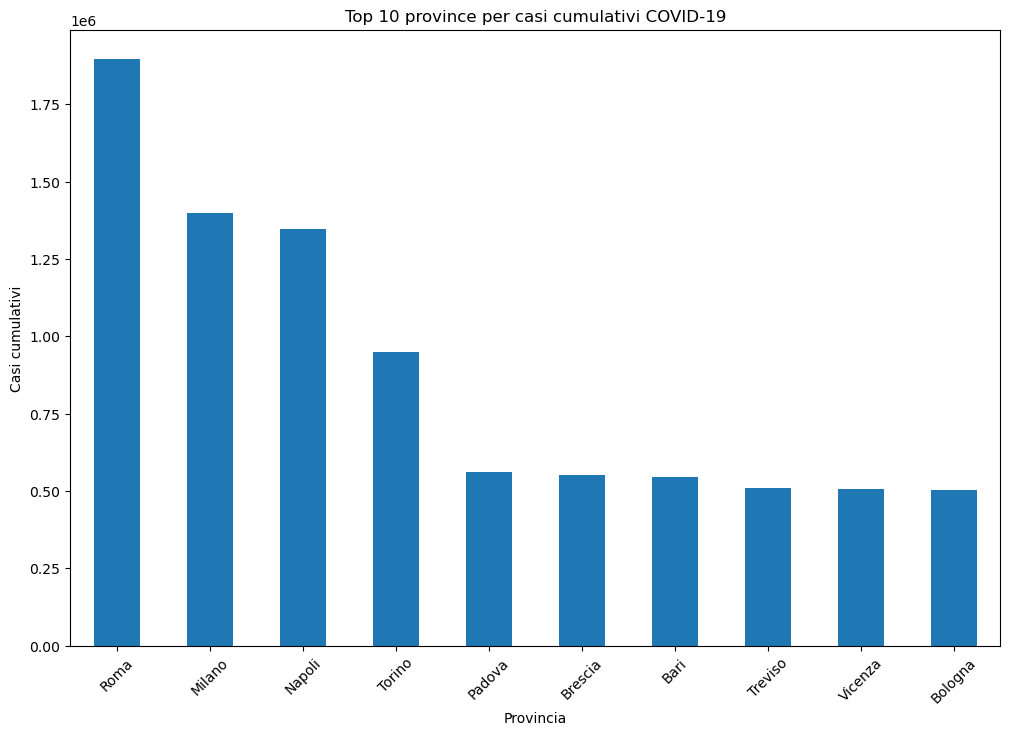

In [13]:
# Analisi del terzo file: Top 10 province per casi cumulativi
top_10_province = df3.groupby('PROV_names')['CASI_CUMULATIVI'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
top_10_province.plot(kind='bar')
plt.title('Top 10 province per casi cumulativi COVID-19')
plt.xlabel('Provincia')
plt.ylabel('Casi cumulativi')
plt.xticks(rotation=45)
plt.show()

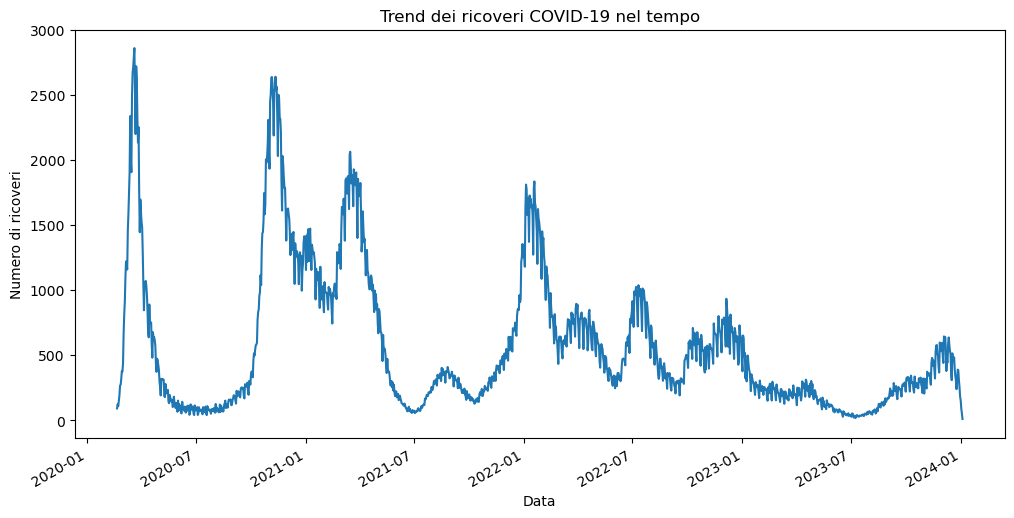

In [14]:
# Analisi del quarto file: Trend dei ricoveri
plt.figure(figsize=(12, 6))
df4.set_index('DATARICOVERO1')['RICOVERI'].plot()
plt.title('Trend dei ricoveri COVID-19 nel tempo')
plt.xlabel('Data')
plt.ylabel('Numero di ricoveri')
plt.show()

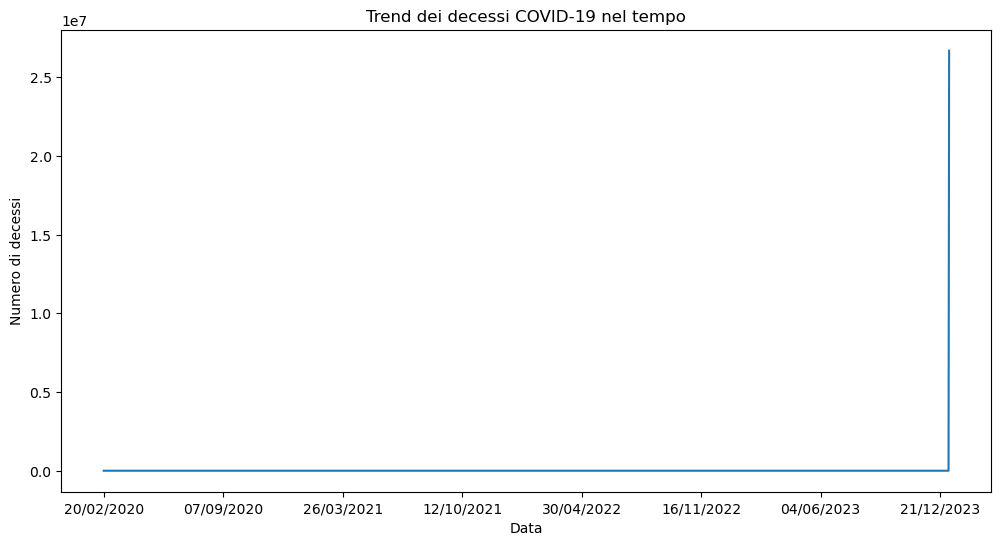

In [16]:
# Analisi del quinto file: Trend dei decessi
plt.figure(figsize=(12, 6))
df5.set_index('DATA_DECESSO')['DECESSI'].plot()
plt.title('Trend dei decessi COVID-19 nel tempo')
plt.xlabel('Data')
plt.ylabel('Numero di decessi')
plt.show()

C:\Users\fabio\.ms-ad\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


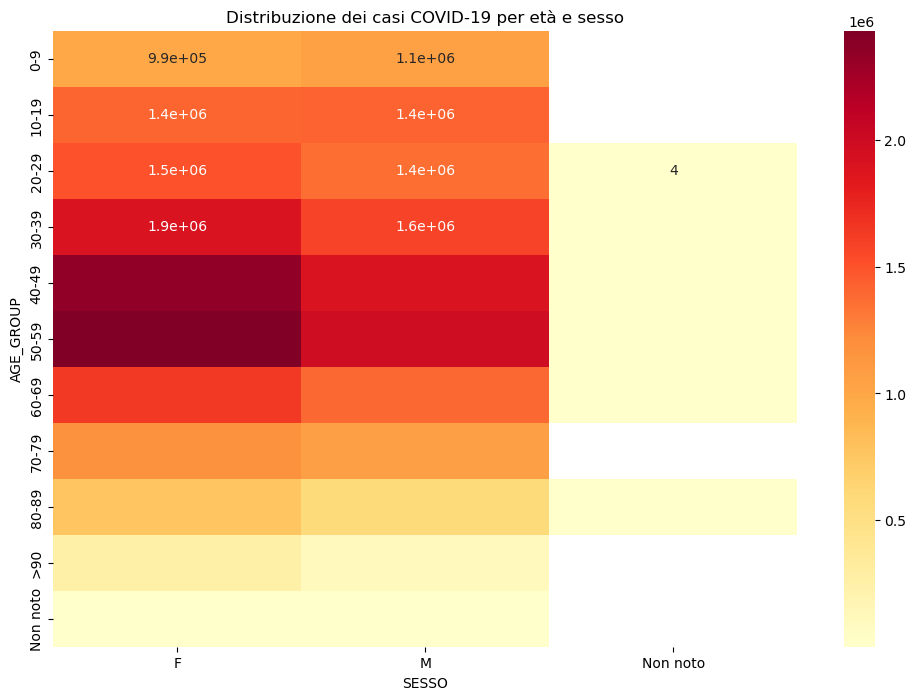

C:\Users\fabio\.ms-ad\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


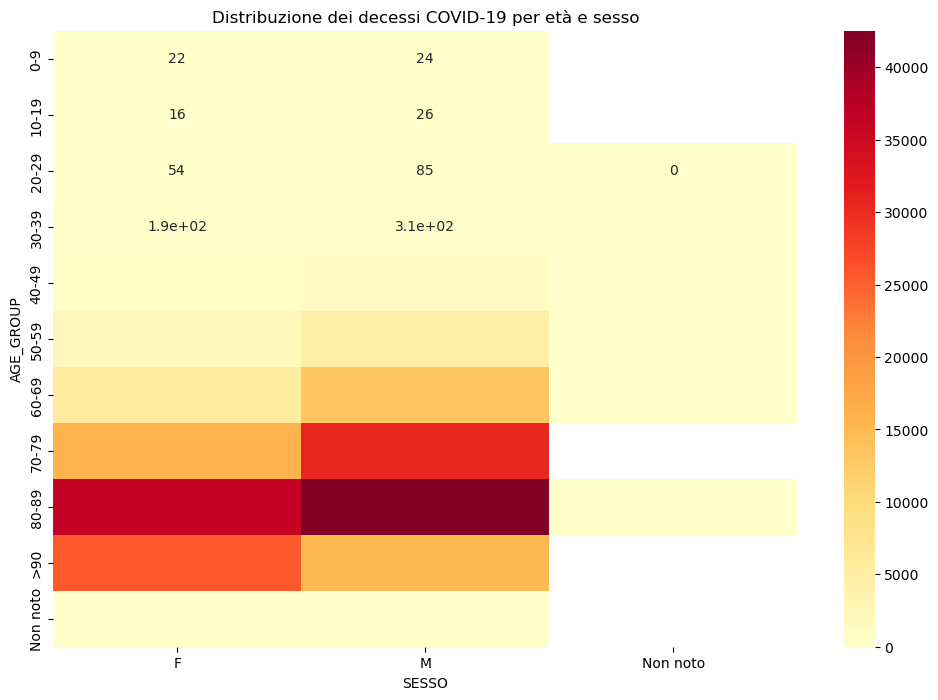

In [18]:
# Analisi del sesto file: Distribuzione dei casi e decessi per età e sesso
plt.figure(figsize=(12, 8))
sns.heatmap(df6.pivot_table(values='CASI_CUMULATIVI', index='AGE_GROUP', columns='SESSO'), annot=True, cmap='YlOrRd')
plt.title('Distribuzione dei casi COVID-19 per età e sesso')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(df6.pivot_table(values='DECEDUTI', index='AGE_GROUP', columns='SESSO'), annot=True, cmap='YlOrRd')
plt.title('Distribuzione dei decessi COVID-19 per età e sesso')
plt.show()

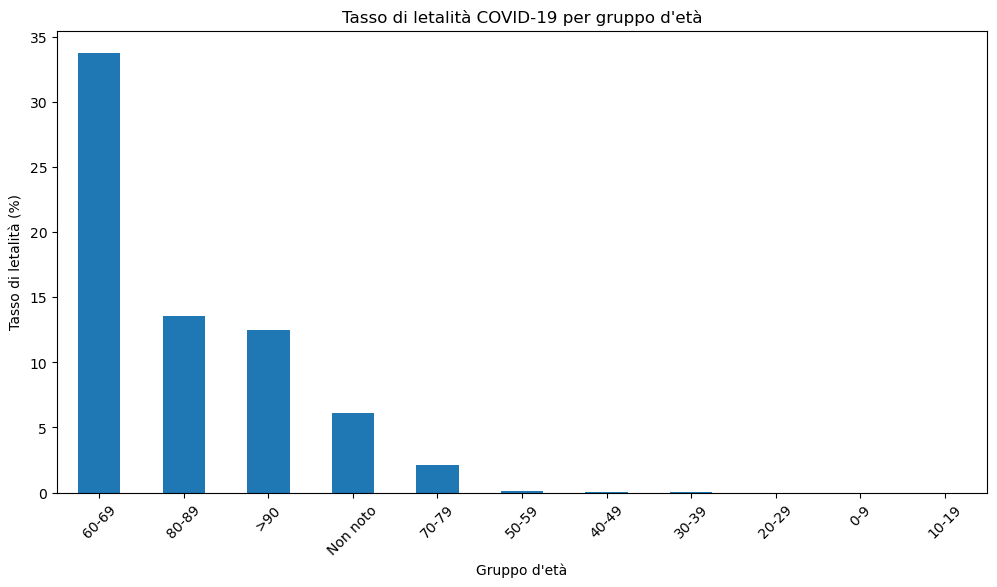

In [20]:
# Calcolo del tasso di letalità per gruppo d'età
df6['CFR'] = df6['DECEDUTI'] / df6['CASI_CUMULATIVI'] * 100
cfr_by_age = df6.groupby('AGE_GROUP')['CFR'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
cfr_by_age.plot(kind='bar')
plt.title('Tasso di letalità COVID-19 per gruppo d\'età')
plt.xlabel('Gruppo d\'età')
plt.ylabel('Tasso di letalità (%)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Esportazione per Power BI
output_path = os.path.join(path, 'covid19_data_for_powerbi.xlsx')
df_combined.to_excel(output_path, index=False)
print(f"File esportato: {output_path}")

In [26]:
# Funzione per convertire le date
def convert_to_datetime(df, date_columns):
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

In [27]:
# Conversione delle date
df1 = convert_to_datetime(df1, ['DATA_PRELIEVO_DIAGNOSI', 'iss_date'])
df2 = convert_to_datetime(df2, ['iss_date'])
df3 = convert_to_datetime(df3, ['iss_date'])
df4 = convert_to_datetime(df4, ['DATARICOVERO1', 'iss_date'])
df5 = convert_to_datetime(df5, ['DATA_DECESSI', 'iss_date'])
df6 = convert_to_datetime(df6, ['iss_date'])

C:\Users\fabio\AppData\Local\Temp\ipykernel_14704\2835474993.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[col] = pd.to_datetime(df[col], errors='coerce')


In [29]:
# Verifica dei tipi di dati
print(df1['DATA_PRELIEVO_DIAGNOSI'].dtype)
print(df4['DATARICOVERO1'].dtype)
print(df5['DATA_DECESSO'].dtype)

datetime64[ns]
datetime64[ns]
object


In [35]:
# Converti le colonne di data in formato datetime specificando dayfirst=True
df1['DATA_PRELIEVO_DIAGNOSI'] = pd.to_datetime(df1['DATA_PRELIEVO_DIAGNOSI'], dayfirst=True)
df4['DATARICOVERO1'] = pd.to_datetime(df4['DATARICOVERO1'], dayfirst=True)
df5['DATA_DECESSO'] = pd.to_datetime(df5['DATA_DECESSO'], dayfirst=True)

In [43]:
# Debug: Stampa i nomi delle colonne per ogni DataFrame
print("Colonne df1:", df1.columns)
print("Colonne df4:", df4.columns)
print("Colonne df5:", df5.columns)

Colonne df1: Index(['DATA_PRELIEVO_DIAGNOSI', 'CASI', 'iss_date'], dtype='object')
Colonne df4: Index(['DATARICOVERO1', 'RICOVERI', 'iss_date'], dtype='object')
Colonne df5: Index(['DATA_DECESSO', 'DECESSI', 'iss_date'], dtype='object')


In [44]:
# Preparazione dei dati per Power BI
df_combined = pd.merge(df1, df4[['DATARICOVERO1', 'RICOVERI']], 
                       left_on='DATA_PRELIEVO_DIAGNOSI', right_on='DATARICOVERO1', 
                       how='outer')
print("Colonne dopo il primo merge:", df_combined.columns)

df_combined = pd.merge(df_combined, df5[['DATA_DECESSO', 'DECESSI']], 
                       left_on='DATA_PRELIEVO_DIAGNOSI', right_on='DATA_DECESSO', 
                       how='outer')
print("Colonne dopo il secondo merge:", df_combined.columns)

Colonne dopo il primo merge: Index(['DATA_PRELIEVO_DIAGNOSI', 'CASI', 'iss_date', 'DATARICOVERO1',
       'RICOVERI'],
      dtype='object')
Colonne dopo il secondo merge: Index(['DATA_PRELIEVO_DIAGNOSI', 'CASI', 'iss_date', 'DATARICOVERO1',
       'RICOVERI', 'DATA_DECESSO', 'DECESSI'],
      dtype='object')


In [45]:
# Rinomina le colonne
df_combined = df_combined.rename(columns={'DATA_PRELIEVO_DIAGNOSI': 'DATA', 'casi': 'NUOVI_CASI'})
print("Colonne dopo il rename:", df_combined.columns)

Colonne dopo il rename: Index(['DATA', 'CASI', 'iss_date', 'DATARICOVERO1', 'RICOVERI', 'DATA_DECESSO',
       'DECESSI'],
      dtype='object')


In [47]:
# Funzione per convertire le date
def convert_to_datetime(df, date_columns):
    for col in date_columns:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    return df


In [51]:
# Conversione delle date
df1 = convert_to_datetime(df1, ['DATA_PRELIEVO_DIAGNOSI', 'iss_date'])
df2 = convert_to_datetime(df2, ['iss_date'])
df3 = convert_to_datetime(df3, ['iss_date'])
df4 = convert_to_datetime(df4, ['DATARICOVERO1', 'iss_date'])
df5 = convert_to_datetime(df5, ['DATA_DECESSO', 'iss_date'])
df6 = convert_to_datetime(df6, ['iss_date'])

In [49]:
# Debug: Stampa i nomi delle colonne per ogni DataFrame
print("Colonne df1:", df1.columns)
print("Colonne df4:", df4.columns)
print("Colonne df5:", df5.columns)

Colonne df1: Index(['DATA_PRELIEVO_DIAGNOSI', 'CASI', 'iss_date'], dtype='object')
Colonne df4: Index(['DATARICOVERO1', 'RICOVERI', 'iss_date'], dtype='object')
Colonne df5: Index(['DATA_DECESSO', 'DECESSI', 'iss_date'], dtype='object')


In [50]:
# Preparazione dei dati per Power BI
df_combined = df1.copy()  # Iniziamo con df1 come base

In [53]:
# Aggiungiamo i dati dei ricoveri
df_combined = pd.merge(df_combined, df4[['DATARICOVERO1', 'RICOVERI']], 
                       left_on='DATA_PRELIEVO_DIAGNOSI', right_on='DATARICOVERO1', 
                       how='left')

In [54]:
# Aggiungiamo i dati dei decessi
df_combined = pd.merge(df_combined, df5[['DATA_DECESSO', 'DECESSI']], 
                       left_on='DATA_PRELIEVO_DIAGNOSI', right_on='DATA_DECESSO', 
                       how='left')

In [55]:
print("Colonne dopo i merge:", df_combined.columns)

Colonne dopo i merge: Index(['DATA_PRELIEVO_DIAGNOSI', 'CASI', 'iss_date', 'DATARICOVERO1',
       'RICOVERI', 'DATA_DECESSO', 'DECESSI'],
      dtype='object')


In [57]:
column_mapping = {
    'DATA_PRELIEVO_DIAGNOSI': 'DATA',
}
df_combined = df_combined.rename(columns=column_mapping)

In [58]:
print("Colonne dopo il rename:", df_combined.columns)

Colonne dopo il rename: Index(['DATA', 'CASI', 'iss_date', 'DATARICOVERO1', 'RICOVERI', 'DATA_DECESSO',
       'DECESSI'],
      dtype='object')


In [60]:
# Selezioniamo e ordiniamo le colonne
columns_to_keep = ['DATA']
for col in ['CASI', 'RICOVERI', 'DECESSI']:
    if col in df_combined.columns:
        columns_to_keep.append(col)
    else:
        print(f"Attenzione: la colonna '{col}' non è presente nel DataFrame")

df_combined = df_combined[columns_to_keep]
df_combined = df_combined.sort_values('DATA')

Attenzione: la colonna 'CASI' non è presente nel DataFrame


In [61]:
# Calcoliamo i casi cumulativi se la colonna 'casi' esiste
if 'CASI' in df_combined.columns:
    df_combined['CASI_CUMULATIVI'] = df_combined['CASI'].cumsum()

In [62]:
# Riempiamo i valori NaN con 0 per RICOVERI e DECESSI
df_combined['RICOVERI'] = df_combined['RICOVERI'].fillna(0)
df_combined['DECESSI'] = df_combined['DECESSI'].fillna(0)

print("Colonne finali:", df_combined.columns)
print(df_combined.head())

Colonne finali: Index(['DATA', 'RICOVERI', 'DECESSI'], dtype='object')
        DATA  RICOVERI  DECESSI
0 2020-01-29       0.0      0.0
1 2020-01-30       0.0      0.0
2 2020-01-31       0.0      0.0
3 2020-02-01       0.0      0.0
4 2020-02-02       0.0      0.0


In [63]:
# Esportazione per Power BI
output_path = os.path.join(path, 'covid19_data_for_powerbi.xlsx')
df_combined.to_excel(output_path, index=False)
print(f"File esportato: {output_path}")

File esportato: C:\Users\fabio\OneDrive\Desktop\Nuova cartella\covid19_data_for_powerbi.xlsx


In [66]:
# Prima della visualizzazione, stampiamo le colonne disponibili
print("Colonne disponibili nel DataFrame:")
print(df_combined.columns)


Colonne disponibili nel DataFrame:
Index(['DATA', 'RICOVERI', 'DECESSI'], dtype='object')


In [67]:
# Visualizzazioni
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [68]:
# Funzione per plottare in modo sicuro
def safe_plot(df, x_col, y_col, label):
    if x_col in df.columns and y_col in df.columns:
        plt.plot(df[x_col], df[y_col], label=label)
    else:
        print(f"Attenzione: Impossibile plottare {label}. Colonna mancante.")

Attenzione: Impossibile plottare CASI. Colonna mancante.
Attenzione: Impossibile plottare CASI COMULATIVI. Colonna mancante.


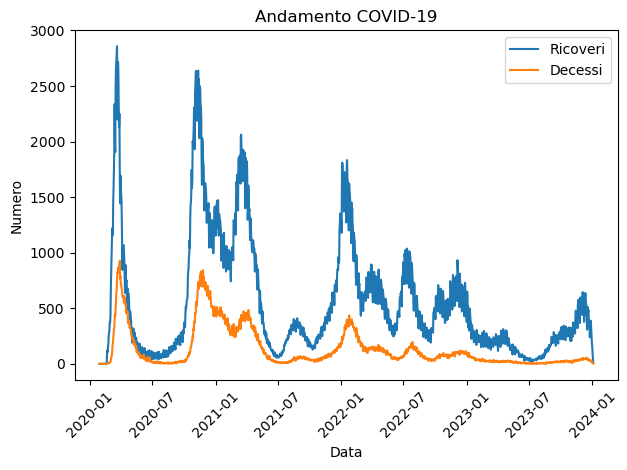

In [71]:
# Plottiamo i dati disponibili
safe_plot(df_combined, 'DATA', 'CASI', 'CASI')
safe_plot(df_combined, 'DATA', 'CASI_CUMULATIVI', 'CASI COMULATIVI')
safe_plot(df_combined, 'DATA', 'RICOVERI', 'Ricoveri')
safe_plot(df_combined, 'DATA', 'DECESSI', 'Decessi')
plt.title('Andamento COVID-19')
plt.xlabel('Data')
plt.ylabel('Numero')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
# Stampiamo alcune statistiche di base
print("\nStatistiche di base:")
print(df_combined.describe())


Statistiche di base:
                      DATA     RICOVERI      DECESSI
count                 1437  1437.000000  1437.000000
mean   2022-01-16 00:00:00   566.399443   135.053584
min    2020-01-29 00:00:00     0.000000     0.000000
25%    2021-01-22 00:00:00   185.000000    21.000000
50%    2022-01-16 00:00:00   361.000000    55.000000
75%    2023-01-10 00:00:00   758.000000   151.000000
max    2024-01-04 00:00:00  2858.000000   927.000000
std                    NaN   548.512754   180.029004


In [73]:
# Esportazione per Power BI (se non l'hai già fatto)
output_path = os.path.join(path, 'covid19_data_for_powerbi.xlsx')
df_combined.to_excel(output_path, index=False)
print(f"\nFile esportato: {output_path}")


File esportato: C:\Users\fabio\OneDrive\Desktop\Nuova cartella\covid19_data_for_powerbi.xlsx
